# Pesquisa de Satisfação ANATEL 2015 a 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import missingno as msno
import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import locale
import time
from tensorflow import keras
import joblib
import shap
#Sklearn


#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

c:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'pt_BR.UTF-8'

## Preparação da Base de Dados

In [3]:
dados= pd.read_csv("Anatel.csv")

linhas= dados.index
colunas= dados.columns

Data_Filter = dados.copy()

Data_Filter = Data_Filter[ dados["ANO_BASE"] > 2016]

print("Quantidade de Linhas após limitar a dada: ", len(Data_Filter))
print("Quantidade de Colunas após limitar a dada: ",  len(Data_Filter.columns))

Data_Filter["ESTADO"] = Data_Filter["ESTADO"].astype('category').cat.codes
Data_Filter["OPERADORA"] = Data_Filter["OPERADORA"].astype('category').cat.codes
Data_Filter.drop("Q2", inplace= True, axis = 1)
Data_Filter.drop("Q2_1", inplace= True, axis = 1)
Data_Filter.drop("Q2_2", inplace= True, axis = 1)
Data_Filter.drop("Q3", inplace= True, axis = 1)
Data_Filter.drop("Q4", inplace= True, axis = 1)
Data_Filter.drop("Q7a", inplace= True, axis = 1)
Data_Filter.drop("A2_1", inplace= True, axis = 1)
Data_Filter.drop("A2_2", inplace= True, axis = 1)
Data_Filter.drop("A2_3", inplace= True, axis = 1)
Data_Filter.drop("A1_4", inplace= True, axis = 1)
Data_Filter.drop("A3", inplace= True, axis = 1)
Data_Filter.drop("A4", inplace= True, axis = 1)
Data_Filter.drop("IDTNS", inplace= True, axis = 1)
Data_Filter.drop("G1", inplace= True, axis = 1)
Data_Filter.drop("G2_1", inplace= True, axis = 1)
Data_Filter.drop("G2_2", inplace= True, axis = 1)
Data_Filter.drop("G2_3", inplace= True, axis = 1)
Data_Filter.drop("E2", inplace= True, axis = 1)
Data_Filter.drop("E4", inplace= True, axis = 1)
Data_Filter.drop("E6", inplace= True, axis = 1)
Data_Filter.drop("E8", inplace= True, axis = 1)
Data_Filter.drop("F2_1", inplace= True, axis = 1)
Data_Filter.drop("F2_2", inplace= True, axis = 1)
Data_Filter.drop("F2_3", inplace= True, axis = 1)
Data_Filter.drop("F4_1", inplace= True, axis = 1)
Data_Filter.drop("F4_2", inplace= True, axis = 1)
Data_Filter.drop("F4_3", inplace= True, axis = 1)
Data_Filter.drop("I1", inplace= True, axis = 1)
Data_Filter.drop("PESO", inplace= True, axis = 1)
Data_Filter.drop("Q1", inplace= True, axis = 1)
Data_Filter.drop("Q6", inplace= True, axis = 1)
Data_Filter.drop("H3", inplace= True, axis = 1)
Data_Filter.drop("COD_IBGE", inplace= True, axis = 1)
Data_Filter.drop("H2a", inplace= True, axis = 1)
Data_Filter.drop("I2", inplace= True, axis = 1)
Data_Filter.drop("TIPO", inplace= True, axis = 1)
Data_Filter.drop("DATA", inplace= True, axis = 1)
Data_Filter.drop("H0", inplace= True, axis = 1)

print("Quantidade de Linhas após Remover as Colunas: ", len(Data_Filter))
print("Quantidade de Colunas após Remover as Colunas: ",  len(Data_Filter.columns))



Data_Filter["A1_2"] = Data_Filter["A1_2"].replace(2,1)
Data_Filter["A1_3"] = Data_Filter["A1_3"].replace(3,1)
Data_Filter["A1_2"] = Data_Filter["A1_2"].fillna(2)
Data_Filter["A1_3"] = Data_Filter["A1_3"].fillna(2)
Data_Filter["A1_1"] = Data_Filter["A1_1"].fillna(2)



Data_Filter = Data_Filter[Data_Filter.J1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.B1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.C1_3 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_1 != 99]
Data_Filter = Data_Filter[Data_Filter.D1_2 != 99]
Data_Filter = Data_Filter[Data_Filter.H1 != 99]
Data_Filter = Data_Filter[Data_Filter.Q7 != 999999] ##Remove pessoas que não respondem a idade
Data_Filter = Data_Filter[Data_Filter.H1 != 999999] ##Remove pessoas que não respondem quantas pessoas moram na residência
Data_Filter = Data_Filter[Data_Filter.H1 != 99999] ##Remove pessoas que não respondem quantas pessoas moram na residência 
Data_Filter = Data_Filter[Data_Filter.H2 != 999999] ##Remove pessoas que não respondem a renda
Data_Filter = Data_Filter[Data_Filter.H2 != 999998] ##Remove pessoas que não respondem a renda
Data_Filter = Data_Filter[Data_Filter.H2 != 999997] ##Remove pessoas que não respondem a renda

print("Quantidade de Linhas após Remover dados Invalidos: ", len(Data_Filter))
print("Quantidade de Colunas após Remover dados Invalidos: ", len(Data_Filter.columns))

Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.


Quantidade de Linhas após limitar a dada:  91935
Quantidade de Colunas após limitar a dada:  63
Quantidade de Linhas após Remover as Colunas:  91935
Quantidade de Colunas após Remover as Colunas:  25
Quantidade de Linhas após Remover dados Invalidos:  64647
Quantidade de Colunas após Remover dados Invalidos:  25


## Respostas por Ano

In a future version of pandas all arguments of Series.sort_index will be keyword-only.


<function matplotlib.pyplot.show(close=None, block=None)>

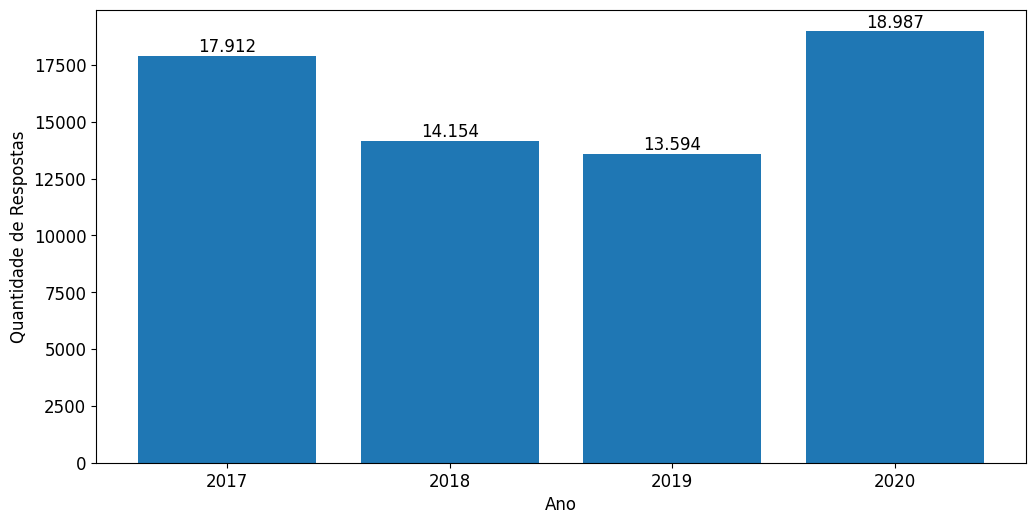

In [11]:
valores = Data_Filter["ANO_BASE"].value_counts()
valores.sort_index(0, inplace = True)

#valores.sort_values(by = "OPERADORA", ascending=False)

#x = valores.index.values
x = ["2017", "2018", "2019", "2020"]
y = valores.values
y2 = list()
for i in y:
    y2.append("{:,}".format(i).replace(",", "."))


fig, ax = plt.subplots()
bars = ax.bar(x, y)
plt.gcf().set_size_inches(12, 6)
Teste = ax.bar_label(bars, fontsize = 12, labels = y2 )
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Ano", fontsize = 12)
plt.xticks( horizontalalignment='center', fontsize = 12)
plt.yticks (fontsize = 12)
plt.ylabel("Quantidade de Respostas", fontsize = 12)

plt.show

## Respostas por Operadora

<function matplotlib.pyplot.show(close=None, block=None)>

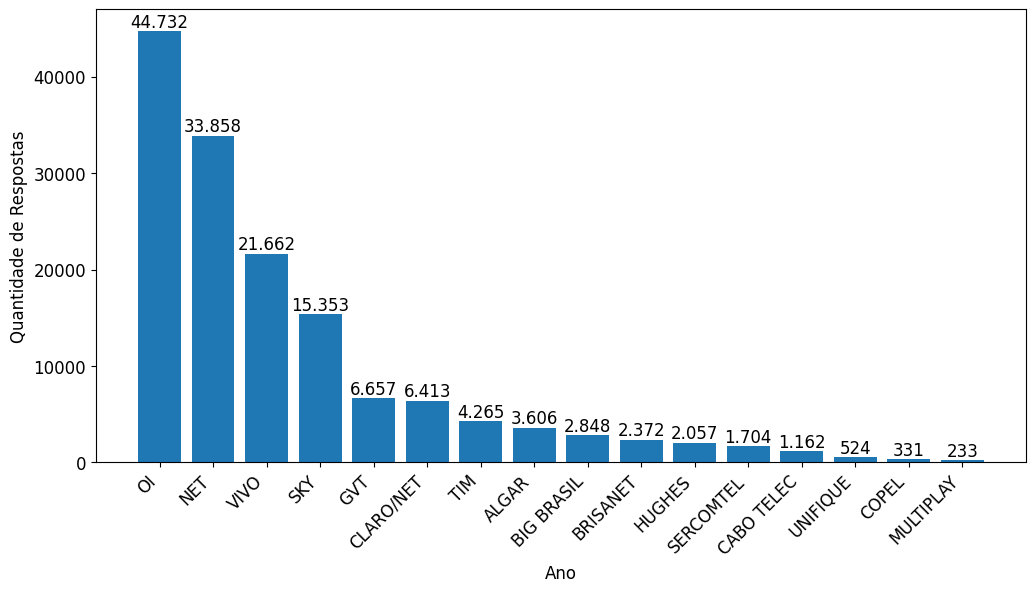

In [17]:
valores = dados["OPERADORA"].value_counts()
#valores.sort_index(0, inplace = True)

valores.sort_values(ascending=False)

x = valores.index.values
y = valores.values
y2 = list()
for i in y:
    y2.append("{:,}".format(i).replace(",", "."))


fig, ax = plt.subplots()
bars = ax.bar(x, y)
plt.gcf().set_size_inches(12, 6)
Teste = ax.bar_label(bars, fontsize = 12, labels = y2 )
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Ano", fontsize = 12)
plt.xticks( rotation=45, horizontalalignment='right', fontsize = 12)
plt.yticks (fontsize = 12)
plt.ylabel("Quantidade de Respostas", fontsize = 12)

plt.show



## Por Estado

<function matplotlib.pyplot.show(close=None, block=None)>

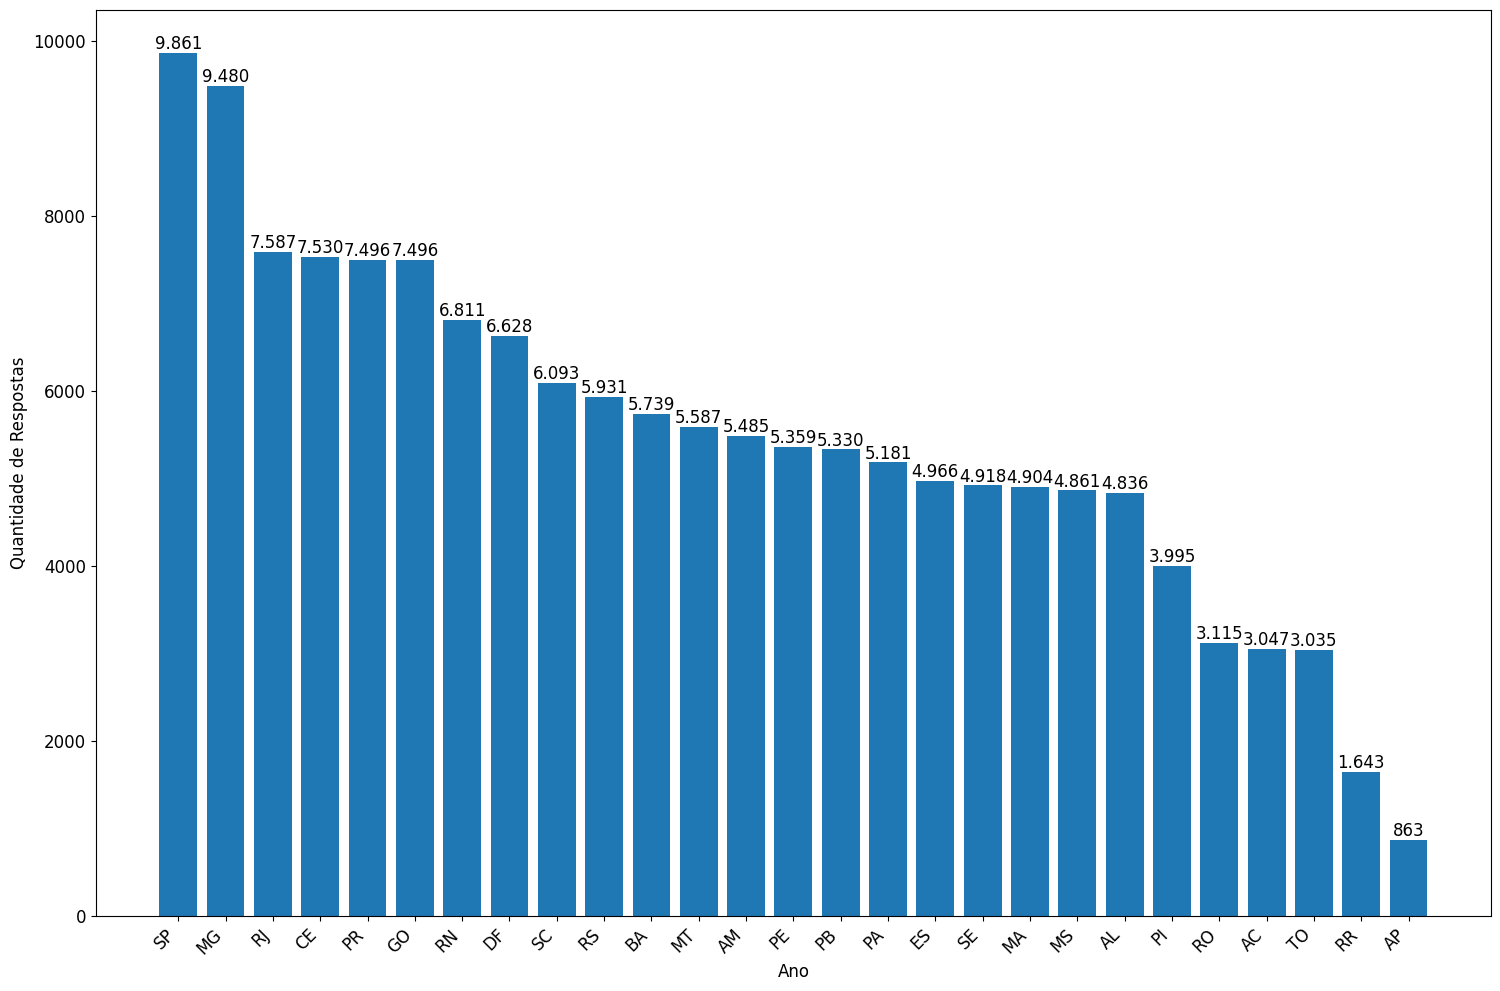

In [28]:
valores = dados["ESTADO"].value_counts()
#valores.sort_index(0, inplace = True)

valores.sort_values(ascending=False)

x = valores.index.values
y = valores.values
y2 = list()
for i in y:
    y2.append("{:,}".format(i).replace(",", "."))


fig, ax = plt.subplots()
bars = ax.bar(x, y)
plt.gcf().set_size_inches(18, 12)
Teste = ax.bar_label(bars, fontsize = 12, labels = y2 , label_type="edge")
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Ano", fontsize = 12)
plt.xticks( rotation=45, horizontalalignment='right', fontsize = 12)
plt.yticks (fontsize = 12)
plt.ylabel("Quantidade de Respostas", fontsize = 12)

plt.show


## Modelo 1 - Balanceamento

In [33]:
DfModelo1 = Data_Filter.copy()

DfModelo1.loc[DfModelo1.J1 >= 6, "J1"] = "SATISFEITO"
DfModelo1.loc[DfModelo1.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"
DfModelo1.head()

,OPERADORA,ESTADO,ANO_BASE,Q5,Q7,Q8,J1,B1_1,B1_2,C1_1,...,A1_2,A1_3,E1,E3,E5,E7,F1,F3,H1,H2
1,3,25,2020,2,63,1,SATISFEITO,5,5,9,...,1.0,2.0,1,2,2.0,2.0,2,2,2,3000
2,3,25,2020,1,56,2,INSATISFEITO,0,0,1,...,1.0,2.0,2,1,1.0,1.0,2,1,2,10000
3,8,6,2020,1,52,1,SATISFEITO,10,10,10,...,2.0,1.0,1,2,1.0,1.0,2,2,1,1300
4,8,19,2020,1,53,1,INSATISFEITO,10,0,0,...,2.0,2.0,1,2,2.0,2.0,2,1,1,1040
6,10,2,2020,1,37,1,INSATISFEITO,5,5,0,...,1.0,2.0,1,2,1.0,1.0,2,2,2,1045


FixedFormatter should only be used together with FixedLocator


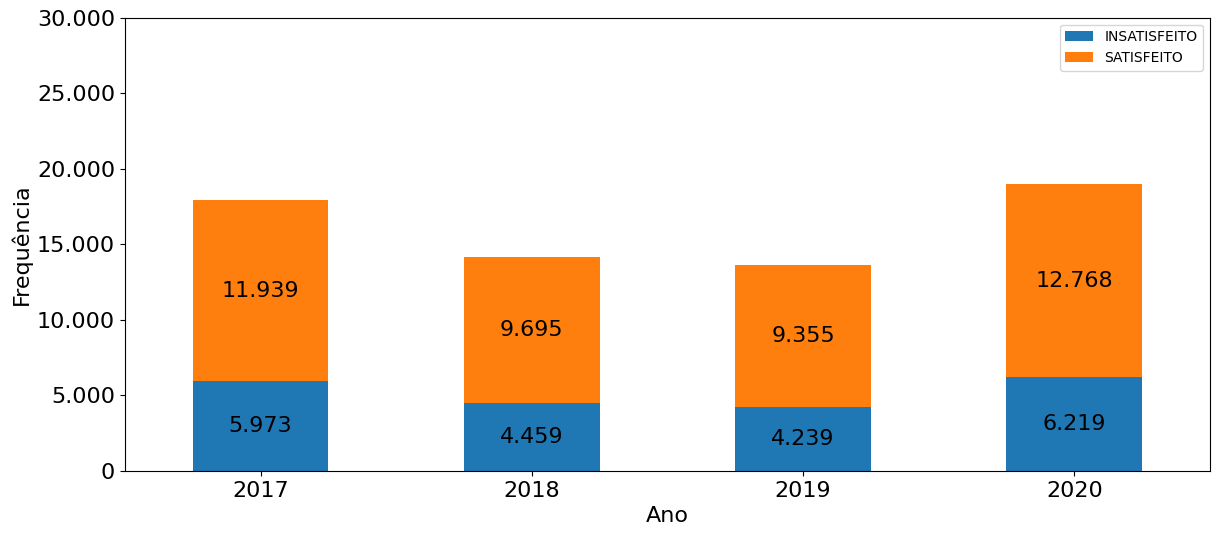

In [40]:
df1 = DfModelo1.groupby(['ANO_BASE', 'J1'])['J1'].count().unstack()

label_satis = list()
label_insatis = list()

for i in df1["SATISFEITO"].values:
    label_satis.append("{:,}".format(i).replace(",", "."))

for i in df1["INSATISFEITO"].values:
    label_insatis.append("{:,}".format(i).replace(",", "."))

ax = df1.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0], labels = label_insatis, fontsize = 16, label_type = 'center')
ax.bar_label(ax.containers[1], labels = label_satis, fontsize = 16, label_type = 'center')
plt.gcf().set_size_inches(14, 6)
plt.xlabel("Ano", fontsize = 16)
ax.set_ylim([0,30000])
plt.xticks( rotation=0, fontsize = 16)
plt.yticks (fontsize = 16)
ax.set_yticklabels([0, "5.000", "10.000", "15.000", "20.000", "25.000", "30.000"])
plt.ylabel("Frequência", fontsize = 16)
plt.legend(loc='upper right')
plt.show()

In [41]:
print(df1)

J1        INSATISFEITO  SATISFEITO
ANO_BASE                          
2017              5973       11939
2018              4459        9695
2019              4239        9355
2020              6219       12768


## Modelo 2 - Balanceamento

In [35]:
DfModelo2 = Data_Filter.copy()


DfModelo2 = DfModelo2[DfModelo2.J1 != 7]
DfModelo2 = DfModelo2[DfModelo2.J1 != 8]

DfModelo2.loc[DfModelo2.J1 >= 9, "J1"] = "SATISFEITO"
DfModelo2.loc[DfModelo2.J1 != "SATISFEITO", "J1"] = "INSATISFEITO"

DfModelo2.head()

,OPERADORA,ESTADO,ANO_BASE,Q5,Q7,Q8,J1,B1_1,B1_2,C1_1,...,A1_2,A1_3,E1,E3,E5,E7,F1,F3,H1,H2
2,3,25,2020,1,56,2,INSATISFEITO,0,0,1,...,1.0,2.0,2,1,1.0,1.0,2,1,2,10000
3,8,6,2020,1,52,1,SATISFEITO,10,10,10,...,2.0,1.0,1,2,1.0,1.0,2,2,1,1300
4,8,19,2020,1,53,1,INSATISFEITO,10,0,0,...,2.0,2.0,1,2,2.0,2.0,2,1,1,1040
6,10,2,2020,1,37,1,INSATISFEITO,5,5,0,...,1.0,2.0,1,2,1.0,1.0,2,2,2,1045
10,13,4,2020,2,28,1,INSATISFEITO,7,3,5,...,1.0,2.0,1,2,2.0,1.0,2,1,2,5000


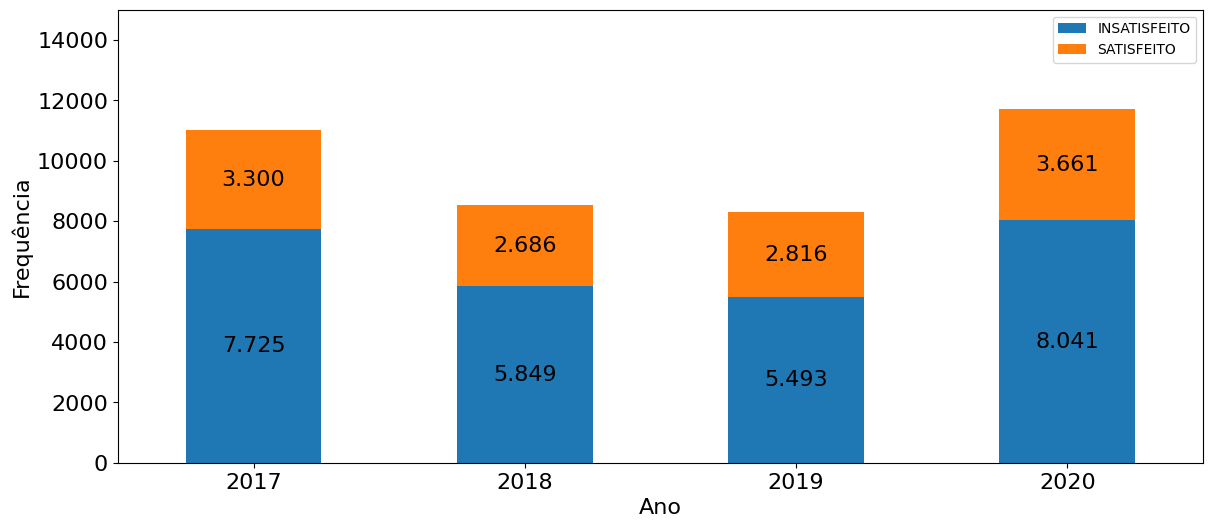

In [38]:
df2 = DfModelo2.groupby(['ANO_BASE', 'J1'])['J1'].count().unstack()

label_satis = list()
label_insatis = list()

for i in df2["SATISFEITO"].values:
    label_satis.append("{:,}".format(i).replace(",", "."))

for i in df2["INSATISFEITO"].values:
    label_insatis.append("{:,}".format(i).replace(",", "."))

ax = df2.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0], labels = label_insatis, fontsize = 16, label_type = 'center')
ax.bar_label(ax.containers[1], labels = label_satis, fontsize = 16, label_type = 'center')
plt.gcf().set_size_inches(14, 6)
plt.xlabel("Ano", fontsize = 16)
ax.set_ylim([0,15000])
plt.xticks( rotation=0, fontsize = 16)
plt.yticks (fontsize = 16)
plt.ylabel("Frequência", fontsize = 16)
plt.legend(loc='upper right')
plt.show()

In [39]:
print(df2)

J1        INSATISFEITO  SATISFEITO
ANO_BASE                          
2017              7725        3300
2018              5849        2686
2019              5493        2816
2020              8041        3661


## Modelo 3 - Balanceamento

In [42]:
#### Remove os dados 7 e 8
DfModelo3 = Data_Filter.copy()


DfModelo3.loc[DfModelo3.J1 <= 6, "J1"] = "Detrator"
DfModelo3.loc[DfModelo3.J1 == 9, "J1"] = "Promotor"
DfModelo3.loc[DfModelo3.J1 == 10, "J1"] = "Promotor"
DfModelo3.loc[DfModelo3.J1 == 7, "J1"] = "Neutro"
DfModelo3.loc[DfModelo3.J1 == 8, "J1"] = "Neutro"
DfModelo3.head()

,OPERADORA,ESTADO,ANO_BASE,Q5,Q7,Q8,J1,B1_1,B1_2,C1_1,...,A1_2,A1_3,E1,E3,E5,E7,F1,F3,H1,H2
1,3,25,2020,2,63,1,Neutro,5,5,9,...,1.0,2.0,1,2,2.0,2.0,2,2,2,3000
2,3,25,2020,1,56,2,Detrator,0,0,1,...,1.0,2.0,2,1,1.0,1.0,2,1,2,10000
3,8,6,2020,1,52,1,Promotor,10,10,10,...,2.0,1.0,1,2,1.0,1.0,2,2,1,1300
4,8,19,2020,1,53,1,Detrator,10,0,0,...,2.0,2.0,1,2,2.0,2.0,2,1,1,1040
6,10,2,2020,1,37,1,Detrator,5,5,0,...,1.0,2.0,1,2,1.0,1.0,2,2,2,1045


In [46]:
DfModelo3.J1.value_counts()

Detrator    27108
Neutro      25076
Promotor    12463
Name: J1, dtype: int64

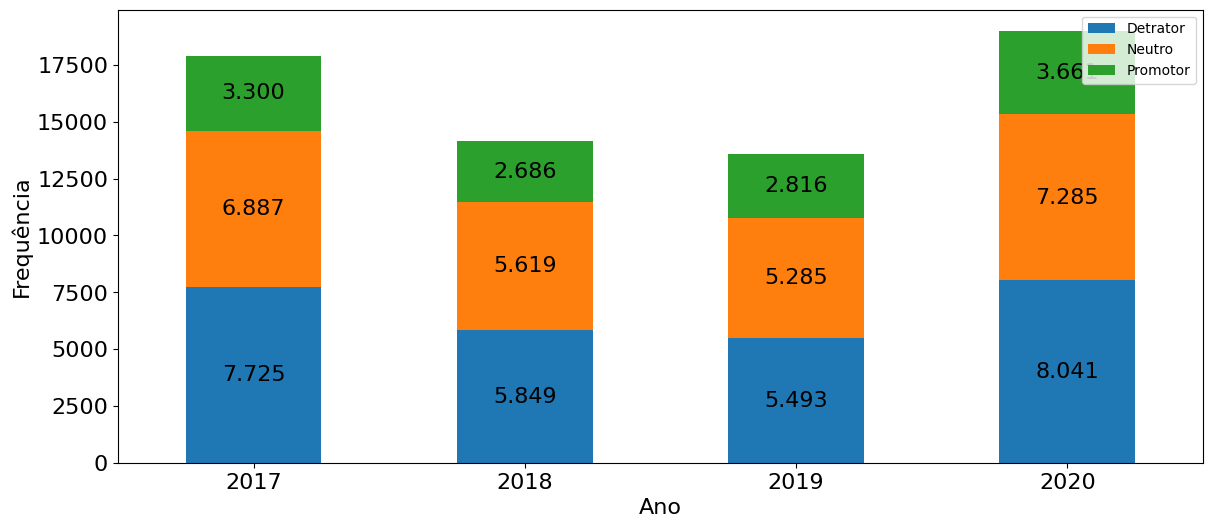

In [44]:
df3 = DfModelo3.groupby(['ANO_BASE', 'J1'])['J1'].count().unstack()

label_detrator = list()
label_neutro = list()
label_promotor = list()

for i in df3["Detrator"].values:
    label_detrator.append("{:,}".format(i).replace(",", "."))

for i in df3["Neutro"].values:
    label_neutro.append("{:,}".format(i).replace(",", "."))

for i in df3["Promotor"].values:
    label_promotor.append("{:,}".format(i).replace(",", "."))

ax = df3.plot(kind='bar', stacked=True)
ax.bar_label(ax.containers[0], labels = label_detrator, fontsize = 16, label_type = 'center')
ax.bar_label(ax.containers[1], labels = label_neutro, fontsize = 16, label_type = 'center')
ax.bar_label(ax.containers[2], labels = label_promotor, fontsize = 16, label_type = 'center')
plt.gcf().set_size_inches(14, 6)
plt.xlabel("Ano", fontsize = 16)
plt.xticks( rotation=0, fontsize = 16)
plt.yticks (fontsize = 16)
plt.ylabel("Frequência", fontsize = 16)
plt.legend(loc='upper right')
plt.show()

In [45]:
df3

J1,Detrator,Neutro,Promotor
ANO_BASE,,,
2017,7725,6887,3300
2018,5849,5619,2686
2019,5493,5285,2816
2020,8041,7285,3661


## Distribuição de Satisfação por Ano

## Geral

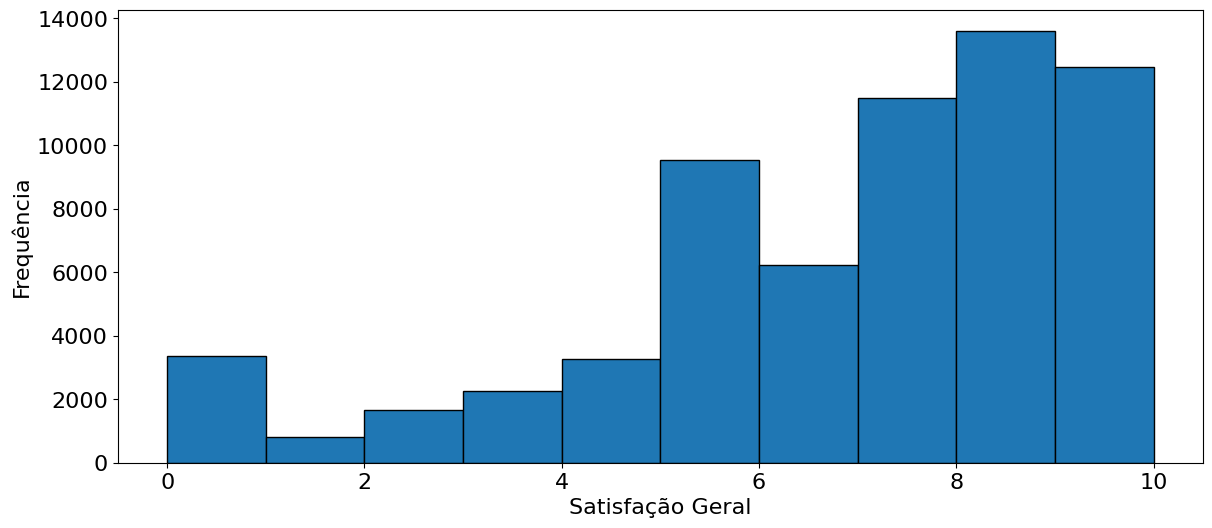

In [56]:
plt.gcf().set_size_inches(14, 6)
plt.hist(Data_Filter['J1'], edgecolor='black', bins = 10)
plt.xlabel('Satisfação Geral', fontsize = 16)
plt.ylabel('Frequência', fontsize = 16)
plt.xticks( rotation=0, fontsize = 16)
plt.yticks (fontsize = 16)
plt.rcParams["figure.dpi"] = 100
plt.show()

Media: 6.4037516748548455 Mediana:  7.0 Desvio Padrao 2.553126737548495
2017    17912
Name: ANO_BASE, dtype: int64
Media: 6.482125194291366 Mediana:  7.0 Desvio Padrao 2.5347716489901515
2018    14154
Name: ANO_BASE, dtype: int64
Media: 6.540238340444314 Mediana:  7.0 Desvio Padrao 2.5750629100069404
2019    13594
Name: ANO_BASE, dtype: int64
Media: 6.427187022699742 Mediana:  7.0 Desvio Padrao 2.5920541385273776
2020    18987
Name: ANO_BASE, dtype: int64


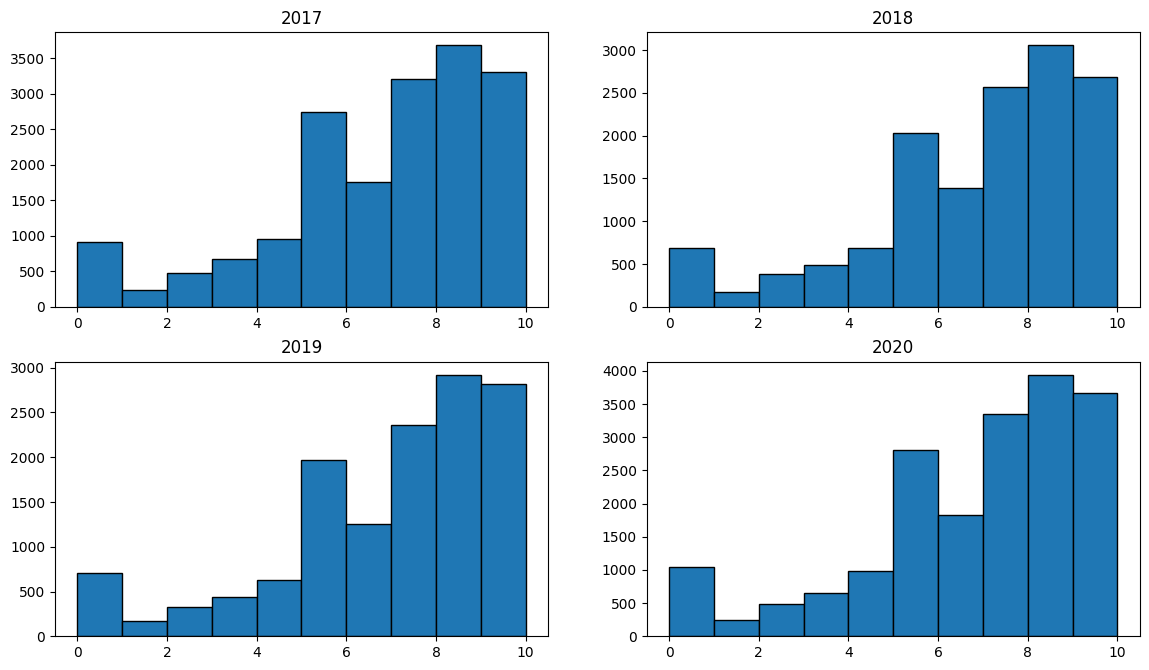

In [88]:
bins_value = 10

figure, axis = plt.subplots(2, 2)

DfModeloAno = Data_Filter.copy()
DfModeloAno = DfModeloAno.loc[DfModeloAno.ANO_BASE == 2017]
print("Media:", DfModeloAno['J1'].mean(), "Mediana: ",DfModeloAno['J1'].median(), "Desvio Padrao",DfModeloAno['J1'].std())
print(DfModeloAno['ANO_BASE'].value_counts())

axis[0,0].hist(DfModeloAno['J1'], edgecolor='black', bins = bins_value)
axis[0,0].set_title('2017')


DfModeloAno = Data_Filter.copy()
DfModeloAno = DfModeloAno.loc[DfModeloAno.ANO_BASE == 2018]
print("Media:", DfModeloAno['J1'].mean(), "Mediana: ",DfModeloAno['J1'].median(), "Desvio Padrao",DfModeloAno['J1'].std())
print(DfModeloAno['ANO_BASE'].value_counts())

axis[0,1].hist(DfModeloAno['J1'], edgecolor='black', bins = bins_value)
axis[0,1].set_title('2018')


DfModeloAno = Data_Filter.copy()
DfModeloAno = DfModeloAno.loc[DfModeloAno.ANO_BASE == 2019]
print("Media:", DfModeloAno['J1'].mean(), "Mediana: ",DfModeloAno['J1'].median(), "Desvio Padrao",DfModeloAno['J1'].std())
print(DfModeloAno['ANO_BASE'].value_counts())

axis[1,0].hist(DfModeloAno['J1'], edgecolor='black', bins = bins_value)
axis[1,0].set_title('2019')

DfModeloAno = Data_Filter.copy()
DfModeloAno = DfModeloAno.loc[DfModeloAno.ANO_BASE == 2020]
print("Media:", DfModeloAno['J1'].mean(), "Mediana: ",DfModeloAno['J1'].median(), "Desvio Padrao",DfModeloAno['J1'].std())
print(DfModeloAno['ANO_BASE'].value_counts())

axis[1,1].hist(DfModeloAno['J1'], edgecolor='black', bins = bins_value)
axis[1,1].set_title('2020')

plt.gcf().set_size_inches(14, 8)
plt.rcParams["figure.dpi"] = 100
plt.show()

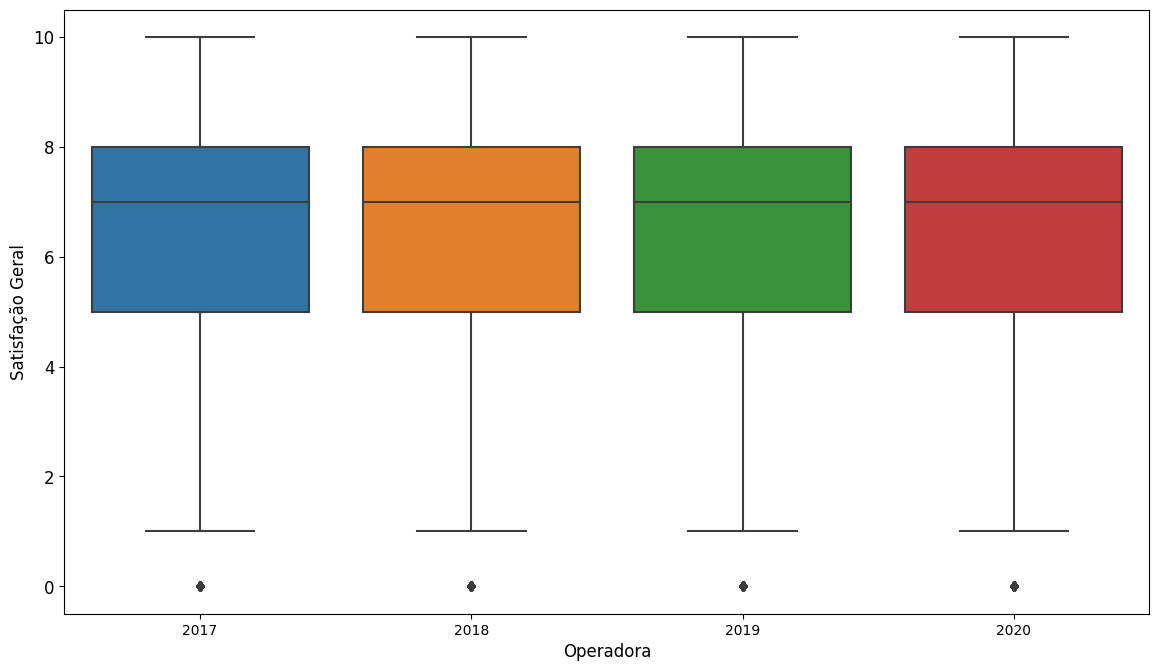

In [81]:
ax = sns.boxplot(x = Data_Filter["ANO_BASE"], y = Data_Filter["J1"], data = Data_Filter)
plt.rcParams["figure.dpi"] = 100
plt.xlabel("Operadora", size = 12)
plt.ylabel("Satisfação Geral", size=12)
plt.gcf().set_size_inches(14, 8)
plt.rcParams["figure.dpi"] = 100
plt.yticks(size = 12)
plt.show()

## Cross Val

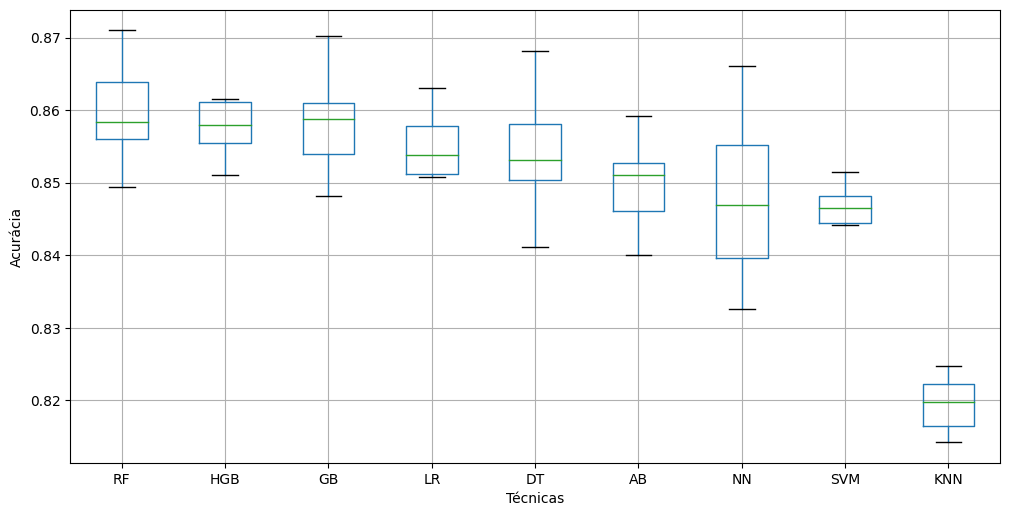

In [101]:
def plot_box_plot_Horizontal(dataframe):
    meds = dataframe.mean()
    meds.sort_values(ascending=False, inplace=True)
    dataframe = dataframe[meds.index]
    dataframe.boxplot(showfliers=False)
    plt.ylabel("Acurácia")
    plt.xlabel("Técnicas")
    plt.xticks(rotation = 0)
    plt.gcf().set_size_inches(12, 6)
    plt.rcParams["figure.dpi"] = 100

CVModel1= pd.read_csv("crosvalModel1.csv")
CVModel1.drop("Unnamed: 0", inplace= True, axis = 1)
CVModel1

plot_box_plot_Horizontal(CVModel1)


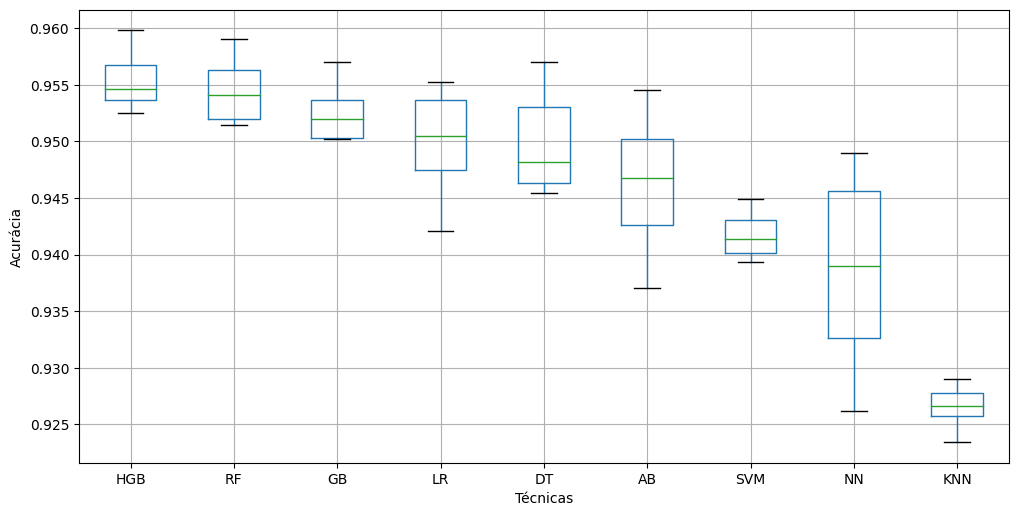

In [98]:
CVModel2= pd.read_csv("crosvalModel2.csv")
CVModel2.drop("Unnamed: 0", inplace= True, axis = 1)
CVModel2

plot_box_plot_Horizontal(CVModel2)

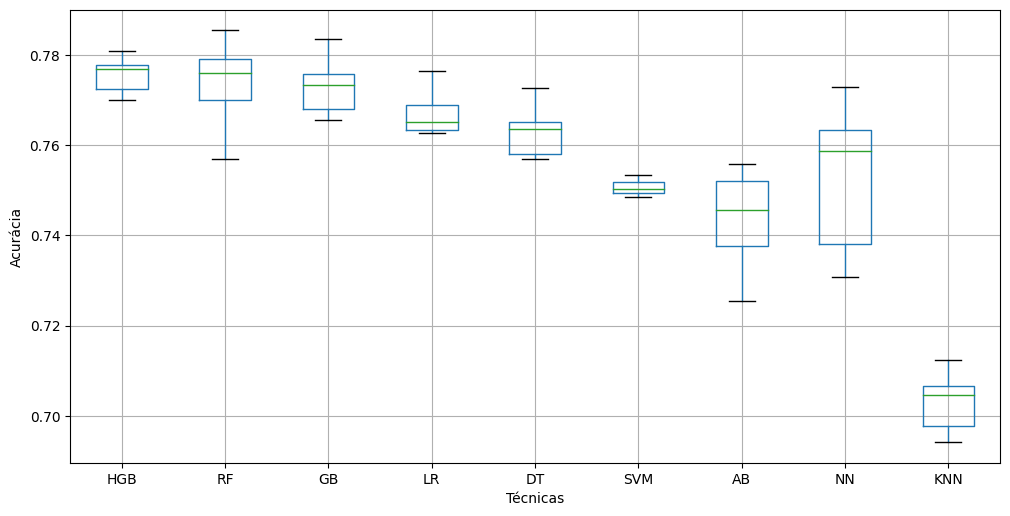

In [99]:
CVModel3= pd.read_csv("crosvalModel3.csv")
CVModel3.drop("Unnamed: 0", inplace= True, axis = 1)
CVModel3

plot_box_plot_Horizontal(CVModel3)